startingPoint:  2.5 1.0271 

path0 stepSize 0.22
path0 0 2.351206701679472 1.0277077337967753
path0 25 1.2717293399476617 1.3219286297664774
path0 50 1.52968581643015 1.722055956423329
path0 75 1.4435782353126472 1.7533805909435791
path0 100 1.4745244967527043 1.75339861702362
path0 125 1.4622922777171816 1.7514325538878537
path0 150 1.4677744195258557 1.7509114569766273
path0 175 1.4652914802174006 1.750589154633817
path0 200 1.4664481169754595 1.7505430277672043
path0 225 1.4659129621281282 1.7505005512514138
path0 250 1.4661626184964416 1.750500117764137
path0 275 1.4660466333504885 1.7504940703805625


path1 stepSize 0.19
path1 0 2.3714966969049986 1.027624861006306
path1 25 1.3610685256237252 1.134494776253525
path1 50 1.516859298774103 1.514149860928458
path1 75 1.468854663002395 1.6610552478603184
path1 100 1.4671601112434418 1.7183851754416288
path1 125 1.4664428990264575 1.7391606489190916
path1 150 1.466207099748808 1.7465156988457453
path1 175 1.4661265084748858 1.7491001456

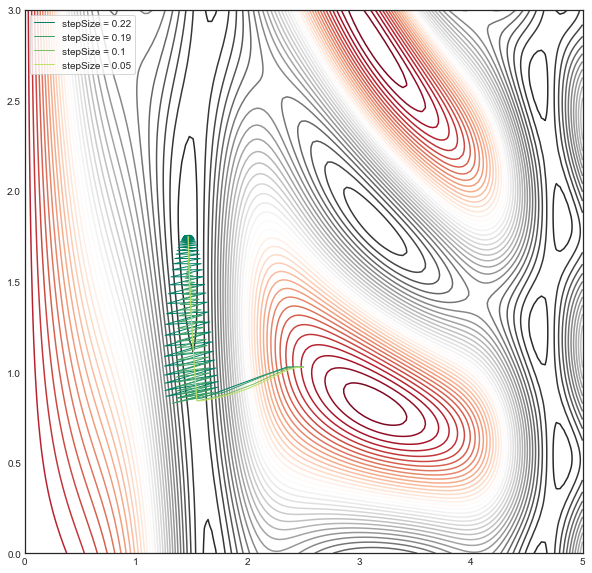

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


def calcGradients(x0, y0, eps = 0.01):
    dfdx = (f(x0+eps,y0    )-f(x0-eps,y0    ))/(2*eps)
    dfdy = (f(x0    ,y0+eps)-f(x0    ,y0-eps))/(2*eps)
    return dfdx, dfdy,f(x0,y0)

def gradientDecent(pathName, x0, y0, eps = 0.01, nMax = 10, alpha = 0.01, beta = 0.9):
    xPath = [x0]
    yPath = [y0]
    
    for step in range(nMax):
        dfdx, dfdy, f0 = calcGradients(x0, y0, eps = 0.01)
        x0 = x0 + alpha*dfdx
        y0 = y0 + alpha*dfdy
        fn = f(x0,y0)
        xPath.append(x0)
        yPath.append(y0)
        
        if np.abs(f0-fn) < 0.00000001:
            break
        if step % 25 ==0:
            print(pathName,step,x0,y0)
    print('\n')
    return xPath, yPath


colorMap = matplotlib.cm.get_cmap('summer')
x = np.linspace(0, 5, 150)
y = np.linspace(0, 3, 140)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, Z, 40, cmap='RdGy');

x0 = 2.5
y0 = 1.0271

print('startingPoint: ', x0, y0,'\n')

stepSizes = [0.22, 0.19, 0.1,0.05]
for n, stepSize in enumerate(stepSizes):
    pathName = 'path'+str(n)
    print(pathName, 'stepSize', stepSize)
    xPath,yPath= gradientDecent(pathName,x0, y0, eps = 0.01, nMax = 1000, alpha = stepSize)
    ax.plot(xPath,yPath,linewidth = 1, color = colorMap(256//len(stepSizes)*n), label='stepSize = '+str(stepSize))
ax.legend(loc='upper left', frameon=True)
